initial done:
observation_list:['Open', 'High', 'Low', 'Close', 'minute', 'hour', 'day', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'dx_30', 'close_30_sma', 'close_60_sma']
 assets:['GBPUSD']
 time serial: 2017-01-02 01:00:00 -> 2017-01-06 23:55:00 length: 1428
plotting...


c:\github\NeoFinRL\.venv\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
c:\github\NeoFinRL\.venv\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn

--- running time: 2.675302267074585---


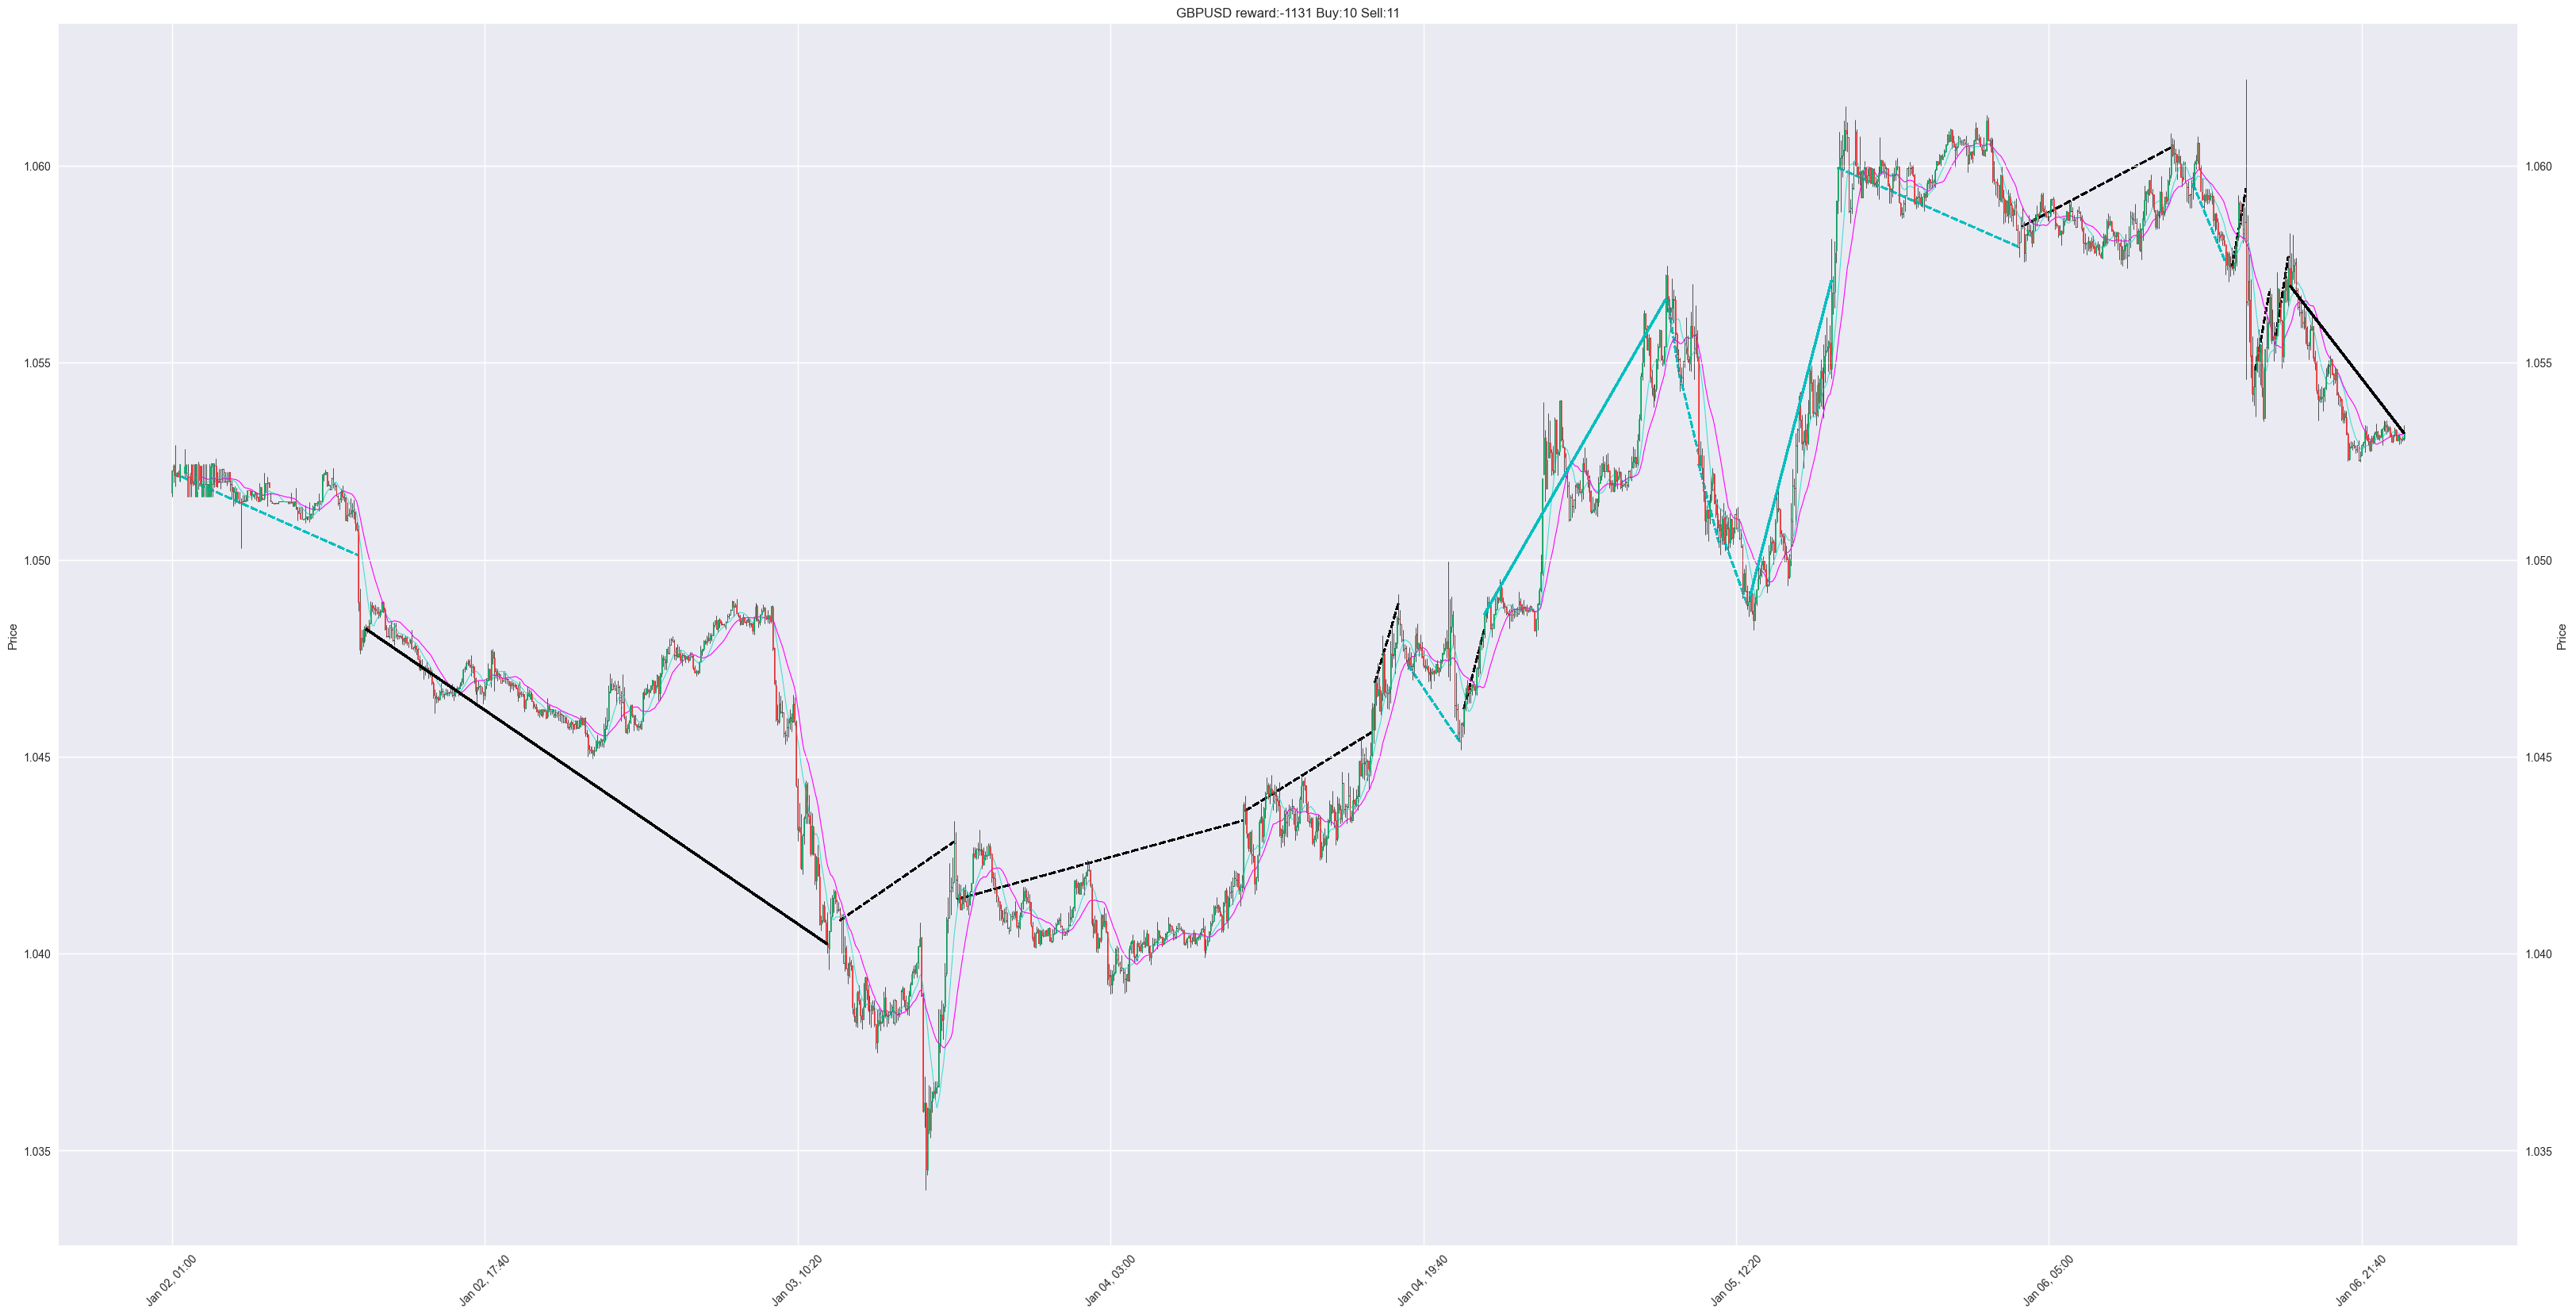

In [10]:
import pandas as pd
from neo_finrl.env_fx_trading.env_fx import tgym
import time
import datetime
import gym
from stable_baselines3 import PPO
from stable_baselines3 import SAC
from stable_baselines3 import TD3
from stable_baselines3.common.env_util import make_vec_env
from neo_finrl.env_fx_trading.util.action_enum import ActionEnum, form_action
file ="./data/split/GBPUSD/weekly/GBPUSD_2017_0.csv"
df = pd.read_csv(file)
env_name ="TradingGym-v1"
# t = gym.make(env_name)
t = tgym(df)
# if model: del model # remove to demonstrate saving and loading
model_name='ppo_fx-2017-6'
if model_name.startswith('ppo'):
    model = PPO.load(model_name)
elif model_name.startswith('sac'):
    model = SAC.load(model_name)
elif model_name.startswith('td3'):
    model = TD3.load(model_name)
else:
    print(f'Model not found: {model_name}')
    exit()
start_time = time.time()
obs = t.reset()
t.current_step=0
done = False
while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, info = t.step(action)
    # print(form_action(action[0]))
t.render(mode='graph')
print(f"--- running time: {(time.time() - start_time)}---")

In [1]:
import pandas as pd
from neo_finrl.env_fx_trading.env_fx import tgym
import time
import datetime
import gym
from stable_baselines3 import PPO
from stable_baselines3 import SAC
from stable_baselines3 import TD3
from stable_baselines3.common.env_util import make_vec_env
file ="./data/split/GBPUSD/weekly/GBPUSD_2017_0.csv"
df = pd.read_csv(file)
model_type = 'ppo'
# env_name ="TradingGym-v1"
# env = gym.make(env_name)
start_time = time.time()
t = tgym(df)

initial done:
observation_list:['Open', 'High', 'Low', 'Close', 'minute', 'hour', 'day', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'dx_30', 'close_30_sma', 'close_60_sma']
 assets:['GBPUSD']
 time serial: 2017-01-02 01:00:00 -> 2017-01-06 23:55:00 length: 1428


In [2]:
model_name = f"./data/models/{model_type}-GBPUSD-week-{datetime.datetime.now().strftime('%Y%m%d%H%M%S')}"
model_name = "ppo_fx-2017-6"
print(f'save model as {model_name}')
model = PPO("MlpPolicy", t, verbose=1)
model.learn(total_timesteps=250000)
model.save(model_name)
print(f"--- trainning time: {(time.time() - start_time)}---")

save model as ppo_fx-2017-6
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.34e+03 |
|    ep_rew_mean     | 1.69e+03 |
| time/              |          |
|    fps             | 1347     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.11e+03     |
|    ep_rew_mean          | 1.78e+03     |
| time/                   |              |
|    fps                  | 836          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0031873528 |
|    clip_fraction        | 0.0277       |
|    clip_range       

In [86]:
from neo_finrl.env_fx_trading.util.action_enum import ActionEnum, form_action
s = t.action_space.sample()
_action,r,st = form_action(s)
print(s, _action,r,st)
if _action in (ActionEnum.BUY, ActionEnum.SELL) :
    print('buy or sell')
else:
    print('hold')

[-0.11444044] 0 0.0 NIL
hold
